># 합성곱 계산의 종류와 풀링

- 합성곱 연산에서 필터를 곱하는 방법에 따라 결과가 다양하게 나올 수 있음
- 합성곱 연산에서 사용하는 기술에는 '패딩', '스트라이드', '풀링'을 예로 들 수 있음

___
>## 패딩<sub>(Padding)

- 패딩이란 포장한다는 의미로, 이미지 가장자리에 무언가를 포장한다는 의미를 갖고 있음  
- 이전 챕터의 예제처럼 패딩과정을 거치치 않더라도 3x3필터의 경우 [1,1]에서, 5x5필터의 경우 [2,2]에서 합성곱 연산을 시작해도 되지만, 이럴 경우 출력 이미지 크기가 작아지게 됨  
- 이를 방지하기 위해 이미지의 가장 외곽 부분에 0이라는 화소를 채워 넣어 사용함
![](https://adeshpande3.github.io/assets/Pad.png)

___
>## 스트라이드<sub>(Stride)

- 스트라이드는 '보폭'이라는 의미로, 필터를 몇칸씩 이동할지 정함
- 일반적으로 한칸씩 이동하지만, 일부 화소를 무시하고 여러 칸씩 이동할 수도 있음
- 단, 이 경우 특징이 제대로 추출되지 않을 수 있음
- 일반적인 stride가 1인 경우:
!["stride1"](https://adeshpande3.github.io/assets/Stride1.png)
- stride가 2인 경우 (이미지 사이즈 축소):
!["stride2"](https://adeshpande3.github.io/assets/Stride2.png)

___
>## 풀링층<sub>(Pooling Layer)

- 풀링층은 일반적으로 합성곱층 바로 뒤에 붙여서 사용
- 합성곱층에서 필터를 적용할 때 어떠한 방식으로 필터를 적용할지 규칙을 설정하는 층임
- 일반적으로 평균값을 선택하는 평균풀링<sub>Average Pooling</sub>과 최댓값을 선택하는 최대풀링<sub>Max Pooling</sub>이 있음
- 풀링층의 크기와 (예를 들어 2x2) 스트라이드는 (예를 들어 2) 일치시키는 것이 일반적임
- 이미지 인식에서는 최대풀링이 빈번하게 사용됨
- 하단은 최대풀링의 예:
![](https://adeshpande3.github.io/assets/MaxPool.png)

___
>## TensorFlow로 합성곱층 구현하기

- TensorFlow를 사용해 매개변수들을(패딩, 스트라이드, 풀링) 결정하고 CNN 수행 가능
- 테스트 전용 이미지는 이전과 마찬가지로 '1'을 나타내는 손글씨 문자임

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터 호출
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/')

# 레이블 1의 입력 이미지
img_in = mnist.test.images[3906]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


- 입력 이미지에 `tf.reshape`를 적용해서 [<배치 수>, <높이>, <너비>, <채널>] 형태로 변경 (`tf.nn.conv2d`를 사용하기 위해 필요한 데이터 형태)
- 필터(가중치): `tf.constant`로 가중치를 정의하되, 만약 학습이 필요한 경우에는 `tf.Variable`로 가중치 정의
- 합성곱층은 `tf.nn.conv2d`로 연산을 수행하며 "입력이미지", "가중치(필터)", "스트라이드", "패딩"을 매개변수로 전달
- 스트라이드는 [<배치>, <높이>, <너비>, <채널>] 순으로 입력 (높이, 너비 순으로 2칸씩 이동한다면 `strides = [1, 2, 2, 1]`로 지정)
- `Padding = 'SAME'`은 입출력 이미지 크기를 '같게'한다는 의미

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


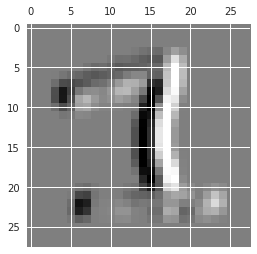

In [9]:
with tf.Graph().as_default():
  x = tf.placeholder(tf.float32, shape = [28**2])
  x_image = tf.reshape(x, shape = [-1, 28, 28, 1])    # <배치 수>, <높이>, <너비>, <채널>
  
  # 필터로 사용할 가중치 정의
  # shape는 [<높이>, <너비>, <입력 채널 수>, <출력 채널 수>]
  w = tf.constant([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]], dtype = tf.float32, shape = [3, 3, 1, 1])
  
  # 합성곱층
  # strides는 [<배치>, <높이>, <너비>, <채널>] 방향의 보폭
  conv = tf.nn.conv2d(x_image, w, strides = [1, 1, 1, 1], padding = 'SAME')
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(conv, feed_dict = {x: img_in})
    
plt.gray()
plt.matshow(result.reshape(28,28))

- 풀링층은 `tf.nn.max_pool`로 연산을 수행 (평균풀링은 `tf.nn.avg_pool`)
- `conv` 합성곱층 연산을 매개변수로 입력 받으며, 풀링 크기(`ksize`)와 풀링 때의 스트라이드(`strides`)도 매개변수로 입력 받음
    *합성곱층에서의 strides와 풀링층에서의 strides가 다름*
- 풀링층에서 패딩과 스트라이드를 (2x2)로 가져갔기 때문에 출력 결과물의 크기가 반으로 줄어듬

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


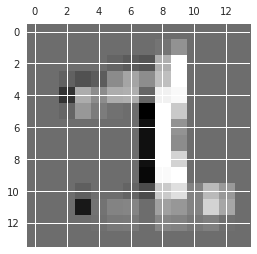

In [11]:
with tf.Graph().as_default():
  x = tf.placeholder(tf.float32, shape = [28**2])
  x_image = tf.reshape(x, shape = [-1, 28, 28, 1])    # <배치 수>, <높이>, <너비>, <채널>
  
  # 필터로 사용할 가중치 정의
  # shape는 [<높이>, <너비>, <입력 채널 수>, <출력 채널 수>]
  w = tf.constant([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]], dtype = tf.float32, shape = [3, 3, 1, 1])
  
  # 합성곱층
  # strides는 [<배치>, <높이>, <너비>, <채널>] 방향의 보폭
  conv = tf.nn.conv2d(x_image, w, strides = [1, 1, 1, 1], padding = 'SAME')
  
  # 풀링층
  pool = tf.nn.max_pool(conv, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(pool, feed_dict = {x: img_in})
    
plt.gray()
plt.matshow(result.reshape(14, 14))